In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
K = 20 # 仅仅使用5000个样本数据进行训练

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
# 数据自动下载链接，并保存到本地
train_data = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

# 如果使用全部训练数据，请注释掉下边四行
train_data.data = train_data.data[:K]
train_data.targets = train_data.targets[:K]
test_data.data = test_data.data[:K]
test_data.targets = test_data.targets[:K]

train_len = len(train_data)
test_len = len(test_data)
print('train length:', train_len)
print('test_length:', test_len)


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.maxpool2 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


lenet = LeNet()
lenet = lenet
optimzer = optim.Adam(lenet.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

train_correct = 0
test_correct = 0
t_acc = []
v_acc = []
losses = []
# 设置训练次数为5次
for epoch in range(15):
    total_loss = 0
    cnt = 0
    start_time = time.time()
    for batch in train_loader:
        images, labels = batch
        outputs = lenet(images)
        loss = loss_function(outputs, labels)
        optimzer.zero_grad()
        loss.backward()
        optimzer.step()
        total_loss += loss.item()
        train_correct += outputs.argmax(dim=1).eq(labels).sum().item()
        cnt += 1
        if cnt % 1000 == 0:
            print('cnt: ', cnt)
    end_time = time.time()
    print('spend time: ', end_time-start_time)
    train_correct = train_correct / train_len
    t_acc.append(train_correct)
    for batch in test_loader:
        images.labels = batch
        out = lenet(images)
        test_correct += out.argmax(dim=1).eq(labels).sum().item()
    test_correct = test_correct / test_len
    v_acc.append(test_correct)
    losses.append(total_loss)
    
    print('total_loss:', total_loss, '  train_correct:', train_correct, '  test_correct:', test_correct)


Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data\cifar-10-python.tar.gz


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
train length: 20
test_length: 20
spend time:  0.0498659610748291
total_loss: 2.3028292655944824   train_correct: 0.15   test_correct: 0.15
spend time:  0.011968374252319336
total_loss: 2.285966157913208   train_correct: 0.1575   test_correct: 0.1575
spend time:  0.0069811344146728516
total_loss: 2.2681946754455566   train_correct: 0.15787500000000002   test_correct: 0.25787499999999997
spend time:  0.007977724075317383
total_loss: 2.2471442222595215   train_correct: 0.25789375   test_correct: 0.41289375
spend time:  0.00797891616821289
total_loss: 2.2206571102142334   train_correct: 0.41289468749999997   test_correct: 0.3206446875
spend time:  0.006982326507568359
total_loss: 2.186767339706421   train_correct: 0.32064473437499996   test_correct: 0.216032234375
spend time:  0.007977724075317383
total_loss: 2.1448464393615723   train_correct: 0.21603223671875   test_correct: 0.26080161171875
spend ti

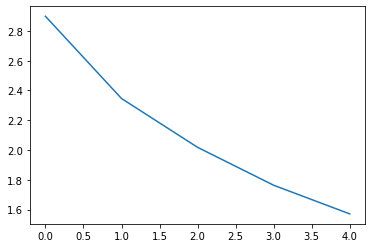

In [3]:
losses = [2.8983,2.3459,2.0180,1.7635,1.5710]
plt.plot(losses)
plt.show()

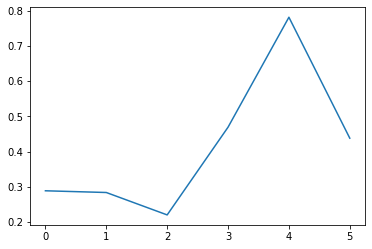

In [19]:
t_acc= [0.2885,
0.2836,
0.2198,
0.4695,
0.7825,
0.4382,

]
plt.plot(t_acc)
plt.show()

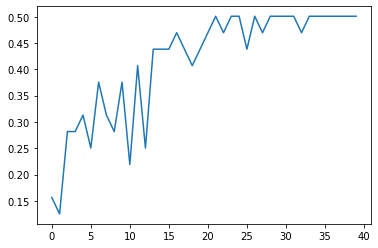

In [6]:
plt.plot(v_acc)
plt.show()